# Dataset Code


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/13/24/23cdf7e7dc33e5c01588c315f8424d31afa9edb05a80168f3d44f7178ff7/torchvision-0.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torch==2.1.1 from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/e8/f6/3eccfb530aac90ad1301c582da228e4763f19e719ac8200752a4841b0b2d/fsspec-2023.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.1 MB 3.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 10.3 MB/s eta 0:0

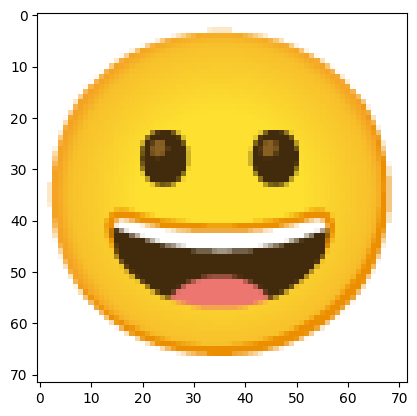

In [3]:
import numpy as np
# !pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import io
import os
import base64
# import cv2
# !pip install torchvision
from torchvision import transforms

emoji = pd.read_csv('./raw_data/full_emoji_raw.csv',encoding='latin1')
emoji.head()

base64_decoded = base64.b64decode(emoji['Google'][0].split(',')[-1])
image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
print(emoji['name'][0])
plt.imshow(image)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    lambda x:x[:3],
    transforms.ToPILImage("RGB")
    ]
)


In [42]:
company = ["Apple",'Google','Facebook','Samsung','Windows',"Twitter","JoyPixels"]
#face[0,95]
import random
dict = {}
for i in range(7):
    dict[company[i]] = []
    for j in emoji.index:
        row = emoji.iloc[j]
        if row[company[i]] is np.NaN:
            continue
        dict[company[i]].append(j)
dict_choose = {}
for i in range(7):
    dict_choose[company[i]] = []
    ii=0
    while ii<80:
        j=random.choice(dict[company[i]])
        if j<=95:
            continue
        dict[company[i]].remove(j)
        dict_choose[company[i]].append(j)
        ii+=1
    ii=0
    while ii<20:
        j=random.choice(dict[company[i]])
        if j>95:
            continue
        dict[company[i]].remove(j)
        dict_choose[company[i]].append(j)
        ii+=1
for i in range(7):
    cc=0
    for j in dict_choose[company[i]]:
        if( j<=95):
            cc+=1
    # print(cc)
    random.shuffle(dict_choose[company[i]])
    # print(dict_choose[company[i]])
    


In [43]:
dict_train = {'text':[],'image':[]}
dict_test = {'text':[],'image':[]}
dict_validation = {'text':[],'image':[]}
train_dir = './Final/data/train_set'
test_dir = './Final/data/test_set'
validation_dir = './Final/data/validation_set'
#os make file direction
os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)
os.makedirs(validation_dir,exist_ok=True)


In [44]:

for i in range(7):
    cnt=0
    for j in dict_choose[company[i]]:
        dict_train['text'].append(emoji['name'][j]+" emoji in "+"<s"+str(i)+">"+" style")
        #dir join
        img_dir=os.path.join(train_dir,f"{company[i]}{cnt}.png")
        row = emoji.iloc[j]
        base64_decoded = base64.b64decode(row[company[i]].split(",")[-1])
        image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
        transformed_image = transform(image)
        transformed_image.save(img_dir)
        dict_train['image'].append(company[i]+str(cnt)+".png")
        cnt+=1
df_train = pd.DataFrame(dict_train)
df_train.to_csv(os.path.join(train_dir,'train_emoji.csv'),index=False)


c:\Users\19793\.conda\envs\default-env\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [26]:
dict_choose={}
for i in range(7):
    dict_choose[company[i]] = []
    j=random.choice(dict[company[i]])
    dict[company[i]].remove(j)
    dict_choose[company[i]].append(j)
    

In [27]:
for i in range(7):
    cnt=0
    for j in dict_choose[company[i]]:
        # dict_validation['text'].append(emoji['name'][j]+ " in "+company[i]+" style")
        dict_validation['text'].append(emoji['name'][j]+" emoji in "+"<s"+str(i)+">"+" style")
        #dir join
        img_dir=os.path.join(validation_dir,f"{company[i]}{cnt}.png")
        row = emoji.iloc[j]
        base64_decoded = base64.b64decode(row[company[i]].split(",")[-1])
        image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
        transformed_image = transform(image)
        transformed_image.save(img_dir)
        dict_validation['image'].append(company[i]+str(cnt)+".png")
        cnt+=1
df_validation = pd.DataFrame(dict_validation)
df_validation.to_csv(os.path.join(validation_dir,'validation_emoji.csv'),index=False)

In [28]:
dict_choose={}
for i in range(7):
    dict_choose[company[i]] = []
    ii=0
    while ii<18:
        j=random.choice(dict[company[i]])
        if j<=95:
            continue
        dict[company[i]].remove(j)
        dict_choose[company[i]].append(j)
        ii+=1
    ii=0
    while ii<2:
        j=random.choice(dict[company[i]])
        if j>95:
            continue
        dict[company[i]].remove(j)
        dict_choose[company[i]].append(j)
        ii+=1
    random.shuffle(dict_choose[company[i]])

In [29]:
for i in range(7):
    cnt=0
    for j in dict_choose[company[i]]:
        # dict_test['text'].append(emoji['name'][j]+ " in "+company[i]+" style")
        dict_test['text'].append(emoji['name'][j] +" emoji"+" in "+"<s"+str(i)+">"+" style")
        #dir join
        img_dir=os.path.join(test_dir,f"{company[i]}{cnt}.png")
        row = emoji.iloc[j]
        base64_decoded = base64.b64decode(row[company[i]].split(",")[-1])
        image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
        transformed_image = transform(image)
        transformed_image.save(img_dir)
        dict_test['image'].append(company[i]+str(cnt)+".png")
        cnt+=1
    
df_test = pd.DataFrame(dict_test)
df_test.to_csv(os.path.join(test_dir,'test_emoji.csv'),index=False)

# Apple

In [12]:
# company = ["Apple",'Google','Facebook','Samsung','Windows',"Twitter","JoyPixels"]
#face[0,95]
target_company = "Apple"
import random
company_list = []
# for i in range(7):
    # dict[company[i]] = []
for j in emoji.index:
    row = emoji.iloc[j]
    if row[target_company] is np.NaN:
        continue
    company_list.append(j)

In [6]:
# dict_choose={}
# dict_choose[company[i]] = []
ii=0
company_choose = []
while ii<460:
    j=random.choice(company_list)
    if j<=95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
ii=0
while ii<40:
    j=random.choice(company_list)
    if j>95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
random.shuffle(company_choose)

In [7]:
dict_train = {'text':[],'image':[]}
dict_test = {'text':[],'image':[]}
dict_validation = {'text':[],'image':[]}
cnt=0
train_dir = './'+target_company+'/train_set'
test_dir = './'+target_company+'/test_set'
validation_dir = './'+target_company+'/validation_set'
#os make file direction
os.makedirs(train_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)
os.makedirs(validation_dir,exist_ok=True)
for j in company_choose:
    dict_train['text'].append(emoji['name'][j] +" emoji")
    #dir join
    img_dir=os.path.join(train_dir,f"{cnt}.png")
    row = emoji.iloc[j]
    base64_decoded = base64.b64decode(row[target_company].split(",")[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    transformed_image = transform(image)
    transformed_image.save(img_dir)
    dict_train['image'].append(str(cnt)+".png")
    cnt+=1
    
df_train = pd.DataFrame(dict_train)
df_train.to_csv(os.path.join(train_dir,'train_emoji.csv'),index=False)

C:\Users\长在晨昏线上的眼睛\AppData\Roaming\Python\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [8]:
ii=0
company_choose = []
while ii<4:
    j=random.choice(company_list)
    if j<=95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
ii=0
while ii<1:
    j=random.choice(company_list)
    if j>95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
random.shuffle(company_choose)

In [9]:
cnt=0
for j in company_choose:
    dict_validation['text'].append(emoji['name'][j] +" emoji")
    #dir join
    img_dir=os.path.join(validation_dir,f"{cnt}.png")
    row = emoji.iloc[j]
    base64_decoded = base64.b64decode(row[target_company].split(",")[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    transformed_image = transform(image)
    transformed_image.save(img_dir)
    dict_validation['image'].append(str(cnt)+".png")
    cnt+=1
    
df_validation = pd.DataFrame(dict_validation)
df_validation.to_csv(os.path.join(validation_dir,'validation_emoji.csv'),index=False)

In [10]:
ii=0
company_choose = []
while ii<90:
    j=random.choice(company_list)
    if j<=95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
ii=0
while ii<10:
    j=random.choice(company_list)
    if j>95:
        continue
    company_list.remove(j)
    company_choose.append(j)
    ii+=1
random.shuffle(company_choose)

In [11]:
cnt=0
for j in company_choose:
    dict_test['text'].append(emoji['name'][j] +" emoji")
    #dir join
    img_dir=os.path.join(test_dir,f"{cnt}.png")
    row = emoji.iloc[j]
    base64_decoded = base64.b64decode(row[target_company].split(",")[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    transformed_image = transform(image)
    transformed_image.save(img_dir)
    dict_test['image'].append(str(cnt)+".png")
    cnt+=1
    
df_test = pd.DataFrame(dict_test)
df_test.to_csv(os.path.join(test_dir,'test_emoji.csv'),index=False)

# First 500 target company

In [15]:
cnt=0
dict_500 = {'text':[],'image':[]}
dir_500 = './'+target_company+"_style_data"+'/first_500_set'
os.makedirs(dir_500,exist_ok=True)
for j in company_list:
    if cnt==500:
        break
    dict_500['text'].append(emoji['name'][j] +" emoji")
    #dir join
    img_dir=os.path.join(dir_500,f"{cnt}.png")
    row = emoji.iloc[j]
    base64_decoded = base64.b64decode(row[target_company].split(",")[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    transformed_image = transform(image)
    transformed_image.save(img_dir)
    dict_500['image'].append(str(cnt)+".png")
    cnt+=1
    
df_500 = pd.DataFrame(dict_500)
df_500.to_csv(os.path.join(dir_500,target_company+'500_emoji.csv'),index=False)

C:\Users\长在晨昏线上的眼睛\AppData\Roaming\Python\Python311\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


# edit prompt

In [8]:
# import pandas as pd
# import os

# # read csv
# df_train = pd.read_csv(os.path.join(train_dir,'train_emoji.csv'))
# df_test = pd.read_csv(os.path.join(test_dir,'test_emoji.csv'))
# df_validation = pd.read_csv(os.path.join(validation_dir,'validation_emoji.csv'))
# #dataframe to dict
# dict_train = df_train.to_dict()
# print(dict_train['text'][1])
# for i in range(7):
#     for j in range(7):
#     #if substring in string
#         if company[i] in dict_train['text'][j]:
#         #split string
#             split_result=dict_train['text'][0].split(company[i])
#         #insert string
#         dict_train['text'][0] = split_result[0]+"<s"+str(i)+">"+split_result[1]
#     split_result=dict_validation['text'][0].split(company[i])
    
#     dict_validation['text'][0] = split_result[0]+"<s"+str(i)+">"+split_result[1]
#     # split_result = df_validation['text'].str.split(company[i])
#     # df_validation['text'] = split_result.str[0]+"s"+str(i)+split_result.str[1]
# pd.save_csv(os.path.join(validation_dir,'validation_emoji.csv'),df_validation)
# for i in range(7):
#     for j in range(20):
#         split_result = df_train['text'].str.split(company[i])
#         df_train['text'] = split_result.str[0]+"s"+str(i)+split_result.str[1]
#     split_result = df_test['text'].str.split(company[i])
#     df_test['text'] = split_result.str[0]+"s"+str(i)+split_result.str[1]

smiling face with smiling eyes in Apple style


IndexError: list index out of range

# Resize Code

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt

from PIL import Image
# import io
import os
from torchvision import transforms

dir='emoji_image/emoji/'
for filename in os.listdir(dir):
    if filename.endswith(".png"):
        print(filename)
        img = Image.open(os.path.join(dir, filename))
        img = transforms.Resize(128)(img)
        # plt.imshow(img)
        img.save(os.path.join(dir, filename))


c:\Users\19793\.conda\envs\default-env\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Apple1.png
Apple10.png
Apple100.png
Apple101.png
Apple102.png
Apple11.png
Apple12.png
Apple13.png
Apple14.png
Apple15.png
Apple16.png
Apple17.png
Apple18.png
Apple19.png
Apple2.png
Apple20.png
Apple21.png
Apple23.png
Apple24.png
Apple25.png
Apple26.png
Apple27.png
Apple28.png
Apple29.png
Apple3.png
Apple30.png
Apple31.png
Apple32.png
Apple33.png
Apple34.png
Apple35.png
Apple36.png
Apple37.png
Apple38.png
Apple39.png
Apple4.png
Apple40.png
Apple41.png
Apple42.png
Apple43.png
Apple44.png
Apple45.png
Apple46.png
Apple47.png
Apple48.png
Apple49.png
Apple5.png
Apple50.png
Apple51.png
Apple52.png
Apple53.png
Apple54.png
Apple55.png
Apple56.png
Apple57.png
Apple58.png
Apple59.png
Apple6.png
Apple60.png
Apple61.png
Apple62.png
Apple63.png
Apple65.png
Apple66.png
Apple67.png
Apple68.png
Apple69.png
Apple7.png
Apple70.png
Apple71.png
Apple72.png
Apple73.png
Apple74.png
Apple75.png
Apple76.png
Apple77.png
Apple78.png
Apple79.png
Apple8.png
Apple80.png
Apple81.png
Apple82.png
Apple83.png
Apple84.p

# Draft Code

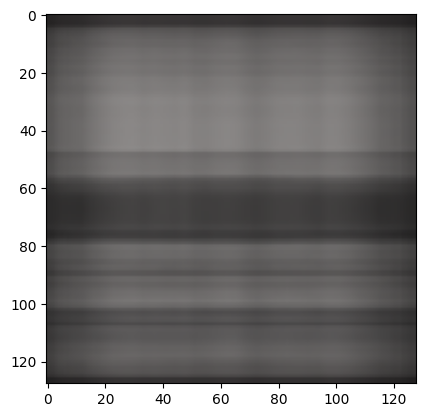

In [2]:
#read .pt file
import torch
# import torchvision
from torchvision import transforms
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# import numpy as np
import matplotlib.pyplot as plt
import os
#import transpose
# from numpy import transpose
# read .pt file
for i in range(5):
    emoji = torch.load(f'model/direct_lora/train_outputs/outputs_epoch{i}_199.pt')
    img = transforms.ToPILImage()(emoji)
    plt.imshow(img)
    #save image
    os.makedirs('sample/direc_lora', exist_ok=True)
    img.save(f'sample/direc_lora/{i}.png')

ogre in Facebook style


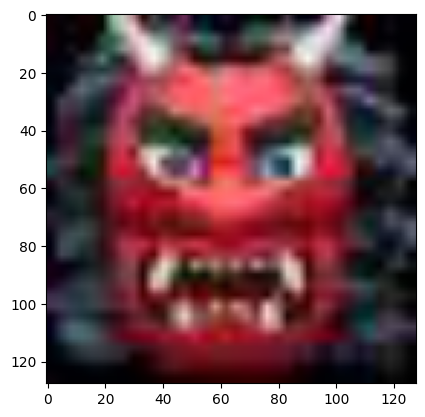

In [8]:
import pandas as pd
#import image
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision import transforms
emoji=pd.read_csv('emoji_image/emoji.csv')
# read emoji
image_path=emoji['image_path'][199]
print(emoji["name"][199])
dir='emoji_image/emoji/'
img = Image.open(os.path.join(dir, image_path))
img = transforms.Resize(128)(img)
plt.imshow(img)
#save image
img.save(f'sample/direc_lora/gt.png')



In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import torch.nn as nn

# 创建文本分类任务的 pipeline
text_classification_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", tokenizer="nlptown/bert-base-multilingual-uncased-sentiment")

# 获取模型和tokenizer
base_model = text_classification_pipeline.model
base_tokenizer = text_classification_pipeline.tokenizer

# 替换输出层
class CustomModel(nn.Module):
    def __init__(self, base_model):
        super(CustomModel, self).__init__()
        # 保留模型的前面层
        self.base_model = nn.Sequential(*list(base_model.children())[:-1])
        # 添加自定义的输出层
        self.custom_output_layer = nn.Linear(base_model.config.hidden_size, 5)  # 5 是示例的输出类别数

    def forward(self, input_ids, attention_mask=None):
        outputs = self.base_model(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        custom_output = self.custom_output_layer(pooled_output)
        return custom_output

# 创建自定义模型
custom_model = CustomModel(base_model)

# 生成一些文本
text = "I love using Hugging Face Transformers"
sentiment = text_classification_pipeline(text)[0]['label']

# 在自定义模型上进行推理
input_ids = base_tokenizer.encode(text, return_tensors="pt")
output = custom_model(input_ids)
print("Sentiment Label:", sentiment)
print("Custom Model Output:", output)
